In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
#import io
#from google.colab import files
#uploaded = files.upload()
#data = pd.read_csv(io.BytesIO(uploaded['turboaz.csv']))

In [ ]:
cols = ['Buraxilish ili','Qiymet','Yurush']
data = pd.read_csv('turboaz.csv', usecols=cols)
data

NameError: ignored

In [ ]:
data['Yurush']=data['Yurush'].str.split(' ').str[0] + data['Yurush'].str.split(' ').str[1]
data['Yurush']=data['Yurush'].str.split('k').str[0]
data['Qiymet']= data['Qiymet'].str.split(' ').str[0]

In [ ]:
x1 = data['Yurush'].astype("int64")
x2 = data['Buraxilish ili'].astype("int64")
y = data['Qiymet'].astype("int64")
x3 = x1
x4 = x2
y1 = y
data

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500
1,2014,102000,31500
2,2002,469700,11700
3,1998,556680,9700
4,2000,300000,12700
...,...,...,...
1323,1996,325000,8800
1324,1994,280000,6300
1325,1998,272000,10900
1326,2000,207000,11300


In [ ]:
print(x1)
print(x2)
print(y)

0       366000
1       102000
2       469700
3       556680
4       300000
         ...  
1323    325000
1324    280000
1325    272000
1326    207000
1327    255700
Name: Yurush, Length: 1328, dtype: int64
0       1999
1       2014
2       2002
3       1998
4       2000
        ... 
1323    1996
1324    1994
1325    1998
1326    2000
1327    1996
Name: Buraxilish ili, Length: 1328, dtype: int64
0       12500
1       31500
2       11700
3        9700
4       12700
        ...  
1323     8800
1324     6300
1325    10900
1326    11300
1327    10500
Name: Qiymet, Length: 1328, dtype: int64


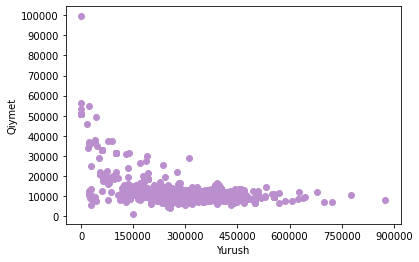

In [ ]:
plt.scatter(x1,y,color = '#bb8fce')
plt.ylabel('Qiymet'); plt.xlabel('Yurush')
plt.yticks(np.arange(0, 110000, step = 10000))
plt.xticks(np.arange(0, 1000000, step = 150000)) 
plt.show()

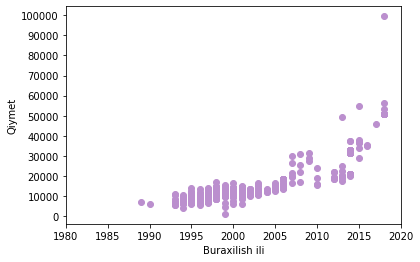

In [ ]:
plt.scatter(x2, y, color = '#bb8fce')
plt.ylabel('Qiymet'); plt.xlabel('Buraxilish ili')
plt.yticks(np.arange(0, 110000, step = 10000))
plt.xticks(np.arange(1980, 2025, step = 5)) 
plt.show()

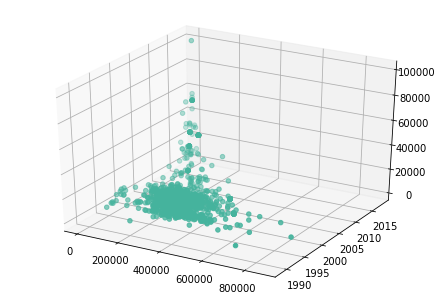

In [ ]:
graf = Axes3D(plt.figure())
graf.scatter(x1, x2, y, color = '#45b39d')
plt.show()

In [ ]:
def meanNorm(dt):
  return ((dt - dt.mean()) / dt.std())

In [ ]:
def myH():
  return np.array([0, 0, 0])

In [ ]:
x1 = meanNorm(x1)
x2 = meanNorm(x2)
y = meanNorm(y)
ln = len(x1)
n = np.ones(ln)
X = np.array([n, x1, x2]).T
H = myH()
alpha = 0.001

In [ ]:
def cost_f(X, Y, h):
  ln = len(Y)
  J = (np.sum((X.dot(h) - Y) ** 2)/( 2 * ln ))
  return J

In [ ]:
init_cost = cost_f(X, y, H)
init_cost

0.49962349397590294

In [ ]:
def grd(X, Y, H, alpha, its):
  cs = [0]*its
  ln = len(y)
  for its in range(its):
    if its%1000 == 0:
      print("iters #%d" % its)
      print(cost_f(X, Y, H))
    deriv = X.dot(H) - Y
    grad = X.T.dot(deriv)/ln
    H = H - alpha*grad
    cost = cost_f(X, Y, H)
    cs[its] = cost
  return H, cs

In [ ]:
W, cs = grd(X, y, H, alpha, 10000)

iters #0
0.499623493975902
iters #1000
0.15788204408946827
iters #2000
0.13059121240222157
iters #3000
0.1241062519089096
iters #4000
0.12157741975401312
iters #5000
0.1205151239450027
iters #6000
0.12006530257166097
iters #7000
0.11987467290944748
iters #8000
0.11979387926883744
iters #9000
0.11975963660190364


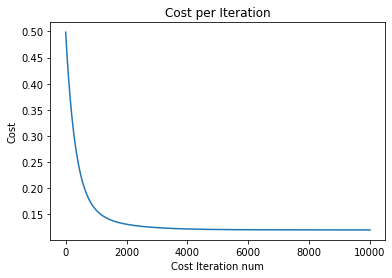

In [ ]:
plt.plot(cs)
plt.xlabel('Cost Iteration num')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.show()

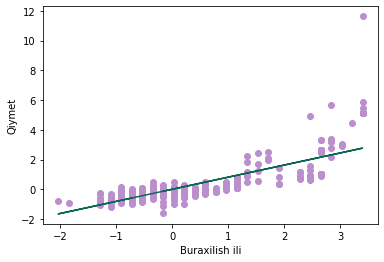

In [ ]:
plt.scatter(x2, y, color = '#bb8fce')
plt.ylabel('Qiymet'); plt.xlabel('Buraxilish ili')
hx = W[0] + W[2]* x2
plt.plot(x2, hx, c='#0e6655')
plt.show()

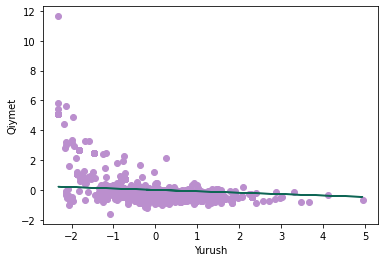

In [ ]:
plt.scatter(x1, y, color = '#bb8fce')
plt.ylabel('Qiymet'); plt.xlabel('Yurush')
hx = W[0] + W[1] * x1 
plt.plot(x1, hx, c='#0e6655')
plt.show()

In [ ]:
def myNorm(myVal, dVal):
  return ((myVal - dVal.mean()) / dVal.std())

In [ ]:
mil = 240000
year = 2000
price = 11500

mil = myNorm(mil,x3)
year = myNorm(year, x4)
price = myNorm(price, y1)

dex_p = W[2] * year + W[1] * mil + W[0]

print(dex_p * y1.std() + y1.mean())
print(price * y1.std() + y1.mean())

mil = 415558
year = 1996
price = 8800

mil = myNorm(mil,x3)
year = myNorm(year, x4)
price = myNorm(price, y1)

dex_p = W[2] * year + W[1] * mil + W[0]

print(dex_p * y1.std() + y1.mean())
print(price * y1.std() + y1.mean())


13466.427209024596
11500.0
7920.738556513201
8800.0


In [ ]:
sec = []
for d in range(len(x3)):
  sec.append([x3[d], x4[d]])

newX = [[240000, 2000],[415558, 1996]]
newY = [11500, 8800]

regr = linear_model.LinearRegression()
regr.fit(sec, y1)

newY = regr.predict( newX )
print('Preddict: \n', newY )
print('Regression coeff: \n', regr.coef_)

Preddict: 
 [13455.18511368  7935.60165749]
Regression coeff: 
 [-5.46720005e-03  1.13994319e+03]


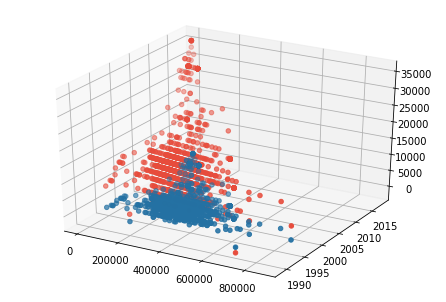

In [ ]:
gr = Axes3D(plt.figure())
gr.scatter(x3, x4, y, color ='#2471a3')
H = regr.intercept_ + regr.coef_[0] * x3 + regr.coef_[1] * x4

gr.scatter(x3, x4, H, c = '#e74c3c')
plt.show()